In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('./ipl/deliveries.csv')
df_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
df_data.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [4]:
dismissial_type = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']

# taking only releveant data 
df_data = df_data[df_data['dismissal_kind'].isin(dismissial_type)]

# we need only bowler name and dismissal type
df_data = df_data[['bowler', 'dismissal_kind']]

In [5]:
df_data = df_data.groupby('bowler').count().reset_index()
df_data

,bowler,dismissal_kind
0,A Ashish Reddy,18
1,A Chandila,11
2,A Choudhary,5
3,A Flintoff,2
4,A Kumble,45
...,...,...
305,YA Abdulla,15
306,YK Pathan,41
307,YS Chahal,70
308,Yuvraj Singh,36


In [6]:
df_data = df_data.sort_values(by='dismissal_kind', ascending=False)

# taking bowler with wickets more than or equal to 90 only
df_data = df_data[(df_data.dismissal_kind >= 90)]
df_data.rename(columns={'dismissal_kind':'wickets'}, inplace=True) 
df_data

,bowler,wickets
255,SL Malinga,154
5,A Mishra,134
200,PP Chawla,126
104,Harbhajan Singh,126
78,DJ Bravo,122
44,B Kumar,111
7,A Nehra,106
215,R Vinay Kumar,103
309,Z Khan,102
205,R Ashwin,100


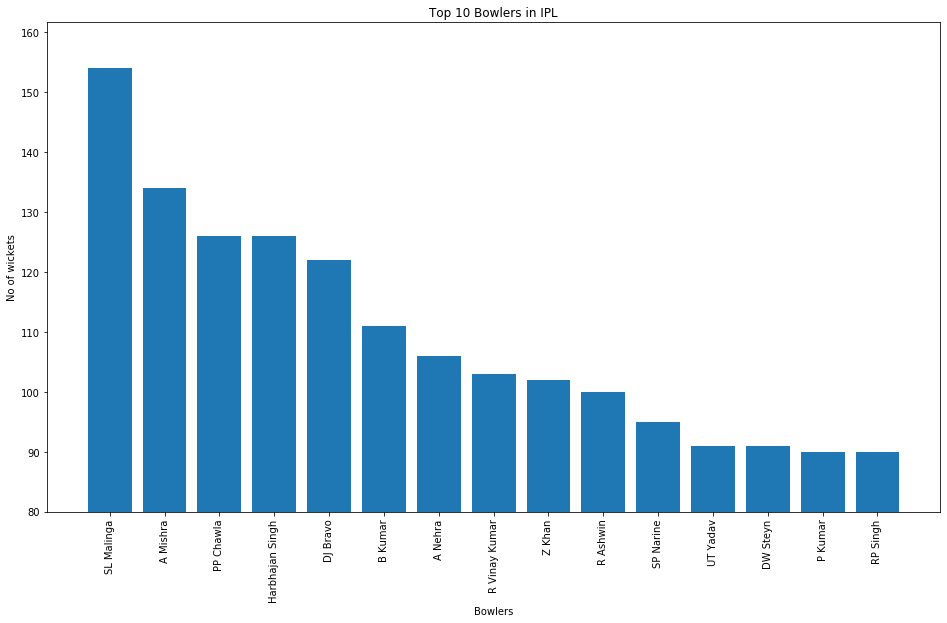

In [7]:
plt.figure(figsize=(16,9))
plt.bar(df_data.bowler, df_data.wickets)
plt.xticks(rotation=90)
plt.title('Top 10 Bowlers in IPL')
plt.ylim(80)
plt.xlabel('Bowlers')
plt.ylabel('No of wickets')
plt.show()